In [1]:
import pandas as pd
%matplotlib inline 

In [2]:
ss2012 = pd.read_csv('SunShine List/sunshine 2012.csv')
ss2013 = pd.read_csv('SunShine List/sunshine 2013.csv')
ss2014 = pd.read_csv('SunShine List/sunshine 2014.csv')
ss2015 = pd.read_csv('SunShine List/sunshine 2015.csv')

## Preview Data

In [3]:
ss2012.head(2)

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,ABBAS,SADIQ,102185.98,119.88,Algonquin College,Professor,2012
1,Colleges,AGATE,JEFFERY MICHAEL,104656.60,335.15,Algonquin College,"Manager, Counselling and Testing Services",2012


In [4]:
ss2013.head(2)

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,ABBAS,SADIQ,102185.98,114.48,Algonquin College,Professor,2013
1,Colleges,AGATE,JEFFERY MICHAEL,108564.60,371.78,Algonquin College,"Manager, Counselling and Testing Services",2013


In [5]:
ss2014.head(2)

,Sector,Last name,First Name,Salary Paid,Taxable Benefits,Employer,Job title,Calendar year
0,Government of Ontario - Ministries,Almond,Margot,"$123,153.63",$204.96,Aboriginal Affairs,"Director, Corporate Management / Directrice, g...",2014
1,Government of Ontario - Ministries,Aniol,Richard,"$102,860.59",$173.98,Aboriginal Affairs,Senior Negotiator / Négociateur principal,2014


In [6]:
ss2015.head(2)
ss2015["Calendar Year"] = 2016 # Cleaning data as secondary information was placed in Calendar Year.
ss2015.head()

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,Abbas,Sadiq,"$105,595.39",$84.24,Algonquin College,Professor,2016
1,Colleges,Abboud,Nadim,"$108,393.10",$126.96,Algonquin College,Professor,2016
2,Colleges,Agate,Jeffery M.,"$125,779.64",$325.58,Algonquin College,"Associate Director, Student Support Services",2016
3,Colleges,Al-Azzawi,Abdul,"$105,595.41",$84.24,Algonquin College,Professor,2016
4,Colleges,Alexander,Doug,"$105,595.41",$126.96,Algonquin College,Professor,2016


## Edit ss2014 to match column names

In [7]:
ss2014.rename(columns = {"Job title":"Job Title", "Calendar year":"Calendar Year", "Last name":"Last Name"}, inplace=True)
ss2014.head(2)

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Government of Ontario - Ministries,Almond,Margot,"$123,153.63",$204.96,Aboriginal Affairs,"Director, Corporate Management / Directrice, g...",2014
1,Government of Ontario - Ministries,Aniol,Richard,"$102,860.59",$173.98,Aboriginal Affairs,Senior Negotiator / Négociateur principal,2014


## Join dataframes together

In [8]:
sunshine = pd.concat([ss2012,ss2013,ss2014,ss2015], ignore_index=True)
sunshine.head(3)

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,ABBAS,SADIQ,102186,119.88,Algonquin College,Professor,2012
1,Colleges,AGATE,JEFFERY MICHAEL,104657,335.15,Algonquin College,"Manager, Counselling and Testing Services",2012
2,Colleges,AL-AZZAWI,ABDUL,103133,185.88,Algonquin College,Professor,2012


## Clean Data

In [9]:
# Remove the '$' from salaries
sunshine["Salary Paid"] = sunshine["Salary Paid"].astype(str).str.replace("$","") 
#Not all salaries are type float - therefore convert all to str to manipulate
# Remove ','
sunshine["Salary Paid"] = sunshine["Salary Paid"].str.replace(",","")
sunshine["Salary Paid"] = sunshine["Salary Paid"].astype(float)
sunshine.head()

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,ABBAS,SADIQ,102185.98,119.88,Algonquin College,Professor,2012
1,Colleges,AGATE,JEFFERY MICHAEL,104656.60,335.15,Algonquin College,"Manager, Counselling and Testing Services",2012
2,Colleges,AL-AZZAWI,ABDUL,103133.47,185.88,Algonquin College,Professor,2012
3,Colleges,ALLAN,GAIL,104893.10,185.88,Algonquin College,Professor,2012
4,Colleges,ALLEN,IAN D.,104140.79,119.88,Algonquin College,Professor,2012


In [10]:
# Remove "$" and "," from benefits
sunshine["Taxable Benefits"] = sunshine["Taxable Benefits"].astype(str).str.replace("$","")
sunshine["Taxable Benefits"] = sunshine["Taxable Benefits"].str.replace(",","")
sunshine["Taxable Benefits"] = sunshine["Taxable Benefits"].astype(float)
sunshine.head()

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,ABBAS,SADIQ,102185.98,119.88,Algonquin College,Professor,2012
1,Colleges,AGATE,JEFFERY MICHAEL,104656.60,335.15,Algonquin College,"Manager, Counselling and Testing Services",2012
2,Colleges,AL-AZZAWI,ABDUL,103133.47,185.88,Algonquin College,Professor,2012
3,Colleges,ALLAN,GAIL,104893.10,185.88,Algonquin College,Professor,2012
4,Colleges,ALLEN,IAN D.,104140.79,119.88,Algonquin College,Professor,2012


In [11]:
# Check Null values and remove

In [12]:
sunshine.isnull().sum()

Sector              0
Last Name           0
First Name          1
Salary Paid         0
Taxable Benefits    1
Employer            0
Job Title           0
Calendar Year       0
dtype: int64

In [13]:
sunshine[sunshine['First Name'].isnull()] 

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
93157,Crown Agencies,LI,NaN,108421.82,47.18,eHealth Ontario,Privacy and Security Architect,2013


In [14]:
sunshine.iloc[93157,2] = "BLANK"

In [15]:
sunshine[sunshine['Taxable Benefits'].isnull()]

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
382383,Other Public Sector Employers,Malenfant,James,152545.47,NaN,Independent Electricity System Operator,Senior Analyst - Compliance and Dispute Resolu...,2016


In [16]:
sunshine.iloc[382383,4]=0

In [17]:
sunshine['Sector'] = sunshine['Sector'].str.strip().str.upper()

In [18]:
sunshine['Last Name'] = sunshine['Last Name'].str.strip().str.upper()
sunshine['First Name'] = sunshine['First Name'].str.strip().str.upper()

In [19]:
sunshine['Employer'].nunique()

3048

In [20]:
sunshine['Employer'].str.strip().str.upper().nunique()

2799

In [21]:
sunshine['Employer'] = sunshine['Employer'].str.strip().str.upper()

In [22]:
#2016 Data: SECONDED (COMMUNITY SAFETY AND CORRECTIONAL SERVICES) change to match others
#SECONDED (COMM. SAFETY AND CORR. SERVICES)
sunshine["Sector"] = sunshine["Sector"].str.replace("*","")
sunshine["Sector"] = sunshine["Sector"].str.replace("SECONDED \(COMMUNITY SAFETY AND CORRECTIONAL SERVICES\)","SECONDED (COMM. SAFETY AND CORR. SERVICES)")

In [23]:
sunshine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422549 entries, 0 to 422548
Data columns (total 8 columns):
Sector              422549 non-null object
Last Name           422549 non-null object
First Name          422549 non-null object
Salary Paid         422549 non-null float64
Taxable Benefits    422549 non-null float64
Employer            422549 non-null object
Job Title           422549 non-null object
Calendar Year       422549 non-null int64
dtypes: float64(2), int64(1), object(5)
memory usage: 25.8+ MB


## Optimize the sunshine DF

In [24]:
sunshine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422549 entries, 0 to 422548
Data columns (total 8 columns):
Sector              422549 non-null object
Last Name           422549 non-null object
First Name          422549 non-null object
Salary Paid         422549 non-null float64
Taxable Benefits    422549 non-null float64
Employer            422549 non-null object
Job Title           422549 non-null object
Calendar Year       422549 non-null int64
dtypes: float64(2), int64(1), object(5)
memory usage: 25.8+ MB


In [25]:
sunshine.nunique()

Sector                  26
Last Name            59356
First Name           29812
Salary Paid         346146
Taxable Benefits     95113
Employer              2799
Job Title            66466
Calendar Year            4
dtype: int64

In [26]:
sunshine["Sector"] = sunshine["Sector"].astype("category")
sunshine["Employer"] = sunshine["Employer"].astype("category")

In [27]:
sunshine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422549 entries, 0 to 422548
Data columns (total 8 columns):
Sector              422549 non-null category
Last Name           422549 non-null object
First Name          422549 non-null object
Salary Paid         422549 non-null float64
Taxable Benefits    422549 non-null float64
Employer            422549 non-null category
Job Title           422549 non-null object
Calendar Year       422549 non-null int64
dtypes: category(2), float64(2), int64(1), object(3)
memory usage: 20.7+ MB


## Graph Data

In [28]:
year_groups = sunshine.groupby("Calendar Year")

In [29]:
year_groups.get_group(2012)["Sector"].value_counts()

MUNICIPALITIES AND SERVICES                                 19914
UNIVERSITIES                                                14706
SCHOOL BOARDS                                               12037
HYDRO ONE AND ONTARIO POWER GENERATION                      11357
GOVERNMENT OF ONTARIO - MINISTRIES                          10349
HOSPITALS AND BOARDS OF PUBLIC HEALTH                        8449
COLLEGES                                                     4016
OTHER PUBLIC SECTOR EMPLOYERS                                3522
CROWN AGENCIES                                               3185
GOVERNMENT OF ONTARIO - JUDICIARY                             628
GOVERNMENT OF ONTARIO - LEGISLATIVE ASSEMBLY AND OFFICES      246
SECONDED (EDUCATION)                                           94
SECONDED (COMM. SAFETY AND CORR. SERVICES)                     29
SECONDED (CHILDREN & YOUTH SERVICES)                            5
SECONDED (TRAINING, COLLEGES & UNIVERSITIES)                    2
SECONDED (

In [30]:
sector_count_2012 = sunshine[sunshine['Calendar Year']==2012]['Sector'].value_counts()
sector_count_2013 = sunshine[sunshine['Calendar Year']==2013]['Sector'].value_counts()
sector_count_2014 = sunshine[sunshine['Calendar Year']==2014]['Sector'].value_counts()
sector_count_2016 = sunshine[sunshine['Calendar Year']==2016]['Sector'].value_counts()

In [31]:
sector_count_2012[sector_count_2012 > 0] #get values of sectors for each year and create a new dataframe. Y=year, X=Sectors

MUNICIPALITIES AND SERVICES                                 19914
UNIVERSITIES                                                14706
SCHOOL BOARDS                                               12037
HYDRO ONE AND ONTARIO POWER GENERATION                      11357
GOVERNMENT OF ONTARIO - MINISTRIES                          10349
HOSPITALS AND BOARDS OF PUBLIC HEALTH                        8449
COLLEGES                                                     4016
OTHER PUBLIC SECTOR EMPLOYERS                                3522
CROWN AGENCIES                                               3185
GOVERNMENT OF ONTARIO - JUDICIARY                             628
GOVERNMENT OF ONTARIO - LEGISLATIVE ASSEMBLY AND OFFICES      246
SECONDED (EDUCATION)                                           94
SECONDED (COMM. SAFETY AND CORR. SERVICES)                     29
SECONDED (CHILDREN & YOUTH SERVICES)                            5
SECONDED (TRAINING, COLLEGES & UNIVERSITIES)                    2
SECONDED (

In [32]:
a = sector_count_2012.to_frame()
b = sector_count_2013.to_frame()
c = sector_count_2014.to_frame()
d = sector_count_2016.to_frame()

In [34]:
sectors_in_years = a.merge(b, left_index=True, right_index=True, suffixes=('_2012', '_2013')).merge(c, left_index=True, right_index=True).merge(d, left_index=True, right_index=True, suffixes=('_2014', '_2016'))

In [50]:
sectors_in_years

,Sector_2012,Sector_2013,Sector_2014,Sector_2016
MUNICIPALITIES AND SERVICES,19914,25675,30800,35684
UNIVERSITIES,14706,15581,16375,17948
SCHOOL BOARDS,12037,12294,12731,18417
HYDRO ONE AND ONTARIO POWER GENERATION,11357,11777,12026,0
GOVERNMENT OF ONTARIO - MINISTRIES,10349,10483,13536,14096
HOSPITALS AND BOARDS OF PUBLIC HEALTH,8449,9301,11628,13360
COLLEGES,4016,4196,4631,5375
OTHER PUBLIC SECTOR EMPLOYERS,3522,4190,4994,6042
CROWN AGENCIES,3185,3414,3909,4742
GOVERNMENT OF ONTARIO - JUDICIARY,628,633,628,613


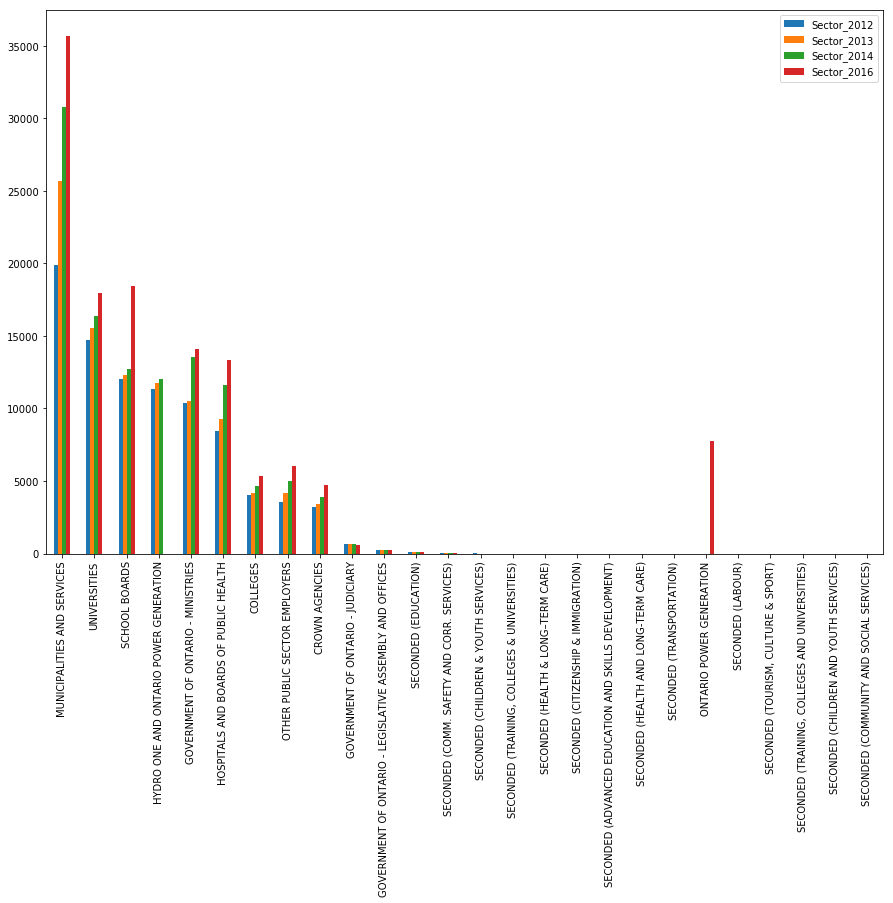

In [63]:
sectors_in_years.plot(kind='bar',figsize=(15,10))

In [121]:
def over_1000(row):
    return (row[0]>1000) | (row[1]>1000) | (row[2]>1000) | (row[3]>1000)
    #return row[0]>1000 & row[1]>1000 & row[2]>1000 & row[3]>1000

In [122]:
sectors_in_years.apply(over_1000, axis=1)
    

MUNICIPALITIES AND SERVICES                                  True
UNIVERSITIES                                                 True
SCHOOL BOARDS                                                True
HYDRO ONE AND ONTARIO POWER GENERATION                       True
GOVERNMENT OF ONTARIO - MINISTRIES                           True
HOSPITALS AND BOARDS OF PUBLIC HEALTH                        True
COLLEGES                                                     True
OTHER PUBLIC SECTOR EMPLOYERS                                True
CROWN AGENCIES                                               True
GOVERNMENT OF ONTARIO - JUDICIARY                           False
GOVERNMENT OF ONTARIO - LEGISLATIVE ASSEMBLY AND OFFICES    False
SECONDED (EDUCATION)                                        False
SECONDED (COMM. SAFETY AND CORR. SERVICES)                  False
SECONDED (CHILDREN & YOUTH SERVICES)                        False
SECONDED (TRAINING, COLLEGES & UNIVERSITIES)                False
SECONDED (

In [116]:
sectors_in_years.apply(lambda row: row>1000)

,Sector_2012,Sector_2013,Sector_2014,Sector_2016
MUNICIPALITIES AND SERVICES,True,True,True,True
UNIVERSITIES,True,True,True,True
SCHOOL BOARDS,True,True,True,True
HYDRO ONE AND ONTARIO POWER GENERATION,True,True,True,False
GOVERNMENT OF ONTARIO - MINISTRIES,True,True,True,True
HOSPITALS AND BOARDS OF PUBLIC HEALTH,True,True,True,True
COLLEGES,True,True,True,True
OTHER PUBLIC SECTOR EMPLOYERS,True,True,True,True
CROWN AGENCIES,True,True,True,True
GOVERNMENT OF ONTARIO - JUDICIARY,False,False,False,False
